# Stock Return

A short exercise adapted from the  [Scipy Conf 2017](https://github.com/enthought/Numpy-Tutorial-SciPyConf-2017).  For a given stock, the return is connected to its close price $ p $ by

$$ \frac{p(t) - p(t - 1)}{p(t-1)} $$


In [1]:
from numpy import arange, loadtxt, zeros
import pandas as pd

In [2]:
df = pd.read_csv("data/aapl-2008-close-values.csv",header=None)
prices = df.iloc[:,1].values
del df

** 1. ** Use these values to calculate the  daily return for each day of that year (except the first one).

In [6]:
prices[:10]
# looks like the prices is sorted from most recent to oldest

array([194.84, 194.93, 180.05, 177.64, 171.25, 179.4 , 178.02, 172.69,
       178.78, 169.04])

In [11]:
returns = prices[:-1] / prices[1:] -1

In [ ]:
# %load solutions/stock_1.py
returns = prices[1:] - prices[:-1]


** 2 **. Plot these returns, converted to percentages, over the course of the year.


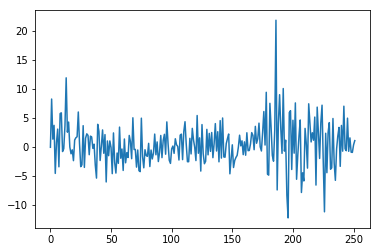

In [35]:
import matplotlib
import matplotlib.pyplot as plt

days = arange(len(prices)-1)
rplot = plt.plot(days, returns * 100)

In [32]:
# %load solutions/stock_2.py

** 3. **  Use a sliding window of 30 to calculate a moving average of the returns

returns has 252 records and 30d MMA returns has 222, 222 expected.


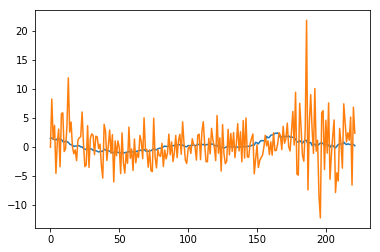

In [50]:
r_mma30 = [returns[i: i+ 30].mean() * 100 for i, rt in enumerate(returns[:-30])]
print(f'returns has {len(returns)} records and 30d MMA returns has {len(r_mma30)}, {len(returns)-30} expected.')

plt.plot(days[:-30], r_mma30)
plt.plot(days[:-30], returns[:-30]*100)

In [ ]:
# %load solutions/stock_3.py
window_len = 30
avg = [ returns[i:i+window_len].mean() for i in range(len(returns) - window_len)]